In [66]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import keras 
from tensorflow.keras.applications import ResNet50
%matplotlib inline
import matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np


In [67]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Matplotlib version:", matplotlib.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.3
Matplotlib version: 3.9.0


In [68]:
# mostrar a quantidade de imagens e classes de treinamento 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    
    "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/train",
    
    image_size=(180, 180),  # Definir o tamanho das imagens
    
    batch_size=32 # quantidade de imagens por lote 

)

Found 9636 files belonging to 6 classes.


In [69]:
# mostrar o nome das classes
nomes_classes = dataset.class_names
nomes_classes

['Apple', 'Banana', 'Grape', 'Mango', 'Orange', 'Strawberry']

In [70]:
# Contar a quantidade de imagens por classe
class_counts = {class_name: 0 for class_name in dataset.class_names}

for images, labels in dataset:
    for label in labels:
        class_name = dataset.class_names[label]
        class_counts[class_name] += 1

# Exibir a quantidade de imagens por classe
for class_name, count in class_counts.items():
    print(f'A classe {class_name} tem {count} imagens')

# Exibir a quantidade total de classes
num_classes = len(dataset.class_names)
print(f'Total de classes: {num_classes}')

# Exibir a quantidade total de imagens
total_images = sum(class_counts.values())
print(f'Total de imagens: {total_images}')

# Exibir a porcentagem de imagens por classe
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f'A classe {class_name} tem {percentage:.2f}% das imagens')

A classe Apple tem 1940 imagens
A classe Banana tem 1863 imagens
A classe Grape tem 1940 imagens
A classe Mango tem 1921 imagens
A classe Orange tem 32 imagens
A classe Strawberry tem 1940 imagens
Total de classes: 6
Total de imagens: 9636
A classe Apple tem 20.13% das imagens
A classe Banana tem 19.33% das imagens
A classe Grape tem 20.13% das imagens
A classe Mango tem 19.94% das imagens
A classe Orange tem 0.33% das imagens
A classe Strawberry tem 20.13% das imagens


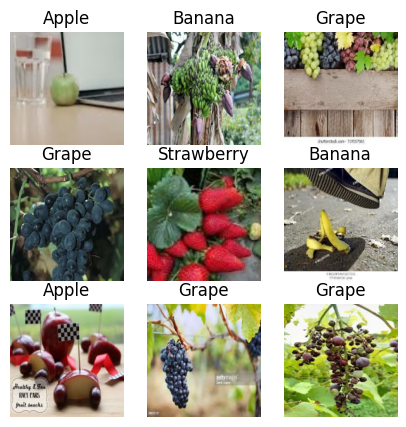

In [72]:
plt.figure(figsize=(5, 5))

for images, labels in dataset.take(1):  # Pegar um lote de imagens
    
    for i in range(9):  # Mostrar as primeiras 9 imagens
        
        ax = plt.subplot(3, 3, i + 1) # exibição das imagens 3X3
        
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.title(nomes_classes[labels[i]]) # para mostrar o nome da classe
        
        plt.axis("off")
        
plt.show()

In [77]:
# Definindo image_size e batch_size
image_size = (180, 180)
batch_size = 32

# Caminhos para os dados de treinamento e validação
treinamento_data = "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/train"
validaca_data = "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/valid"
teste_data ='C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/test'

X_test = validaca_data
X_train = treinamento_data

# Carregando os datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    treinamento_data,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validaca_data,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    teste_data,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)


test_generator = test_datagen.flow_from_directory(
    'C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/test',
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Mantenha a ordem para que as previsões correspondam aos rótulos
)


Found 9636 files belonging to 6 classes.
Found 226 files belonging to 6 classes.
Found 155 files belonging to 6 classes.
Found 155 images belonging to 6 classes.


In [87]:

import tensorflow as tf

# Normalização dos dados usando TensorFlow
train_data = train_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))
val_data = val_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))
test_data = test_data.map(lambda x, y: (tf.image.per_image_standardization(x), y))

# Continuar com a definição e treinamento do modelo...


## aplicando modelo de rede neural

In [88]:
# aplique um modelo de rede neural 

# modelo 1  

modelo2 = models.Sequential()

modelo2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

modelo2.add(layers.MaxPooling2D((2, 2)))

modelo2.add(layers.Dropout(0.5))

modelo2.add(layers.Flatten())

modelo2.add(layers.Dense(64, activation='relu'))

modelo2.add(layers.Dense(16, activation='softmax'))

# compilar o modelo

modelo2.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])

c:\Users\brena\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
history = modelo2.fit(
    train_data,
    epochs=10
)

Epoch 1/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 97s 315ms/step - accuracy: 0.4089 - loss: 2.4347
Epoch 2/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 93s 308ms/step - accuracy: 0.6185 - loss: 0.9747
Epoch 3/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 169s 397ms/step - accuracy: 0.7450 - loss: 0.6910
Epoch 4/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 119s 394ms/step - accuracy: 0.8438 - loss: 0.4625
Epoch 5/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 146s 406ms/step - accuracy: 0.9032 - loss: 0.2933
Epoch 6/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 122s 401ms/step - accuracy: 0.9423 - loss: 0.1965
Epoch 7/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 136s 380ms/step - accuracy: 0.9601 - loss: 0.1368
Epoch 8/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 116s 383ms/step - accuracy: 0.9597 - loss: 0.1288
Epoch 9/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 115s 379ms/step - accuracy: 0.9641 - loss: 0.1220
Epoch 10/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 117s 386ms/step - accuracy: 0.9735 - loss: 0.0923


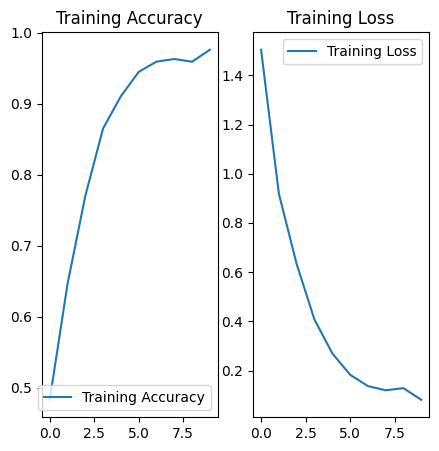

In [90]:
# mostrar o historico de treinamento

acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')

plt.title('Training Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')

plt.title('Training Loss')

plt.show()

In [92]:
# avaliar o modelo

train_loss, train_acc = modelo2.evaluate(train_data, verbose=2)

print('\nTraining accuracy:', train_acc)

print('\nTraining loss:', train_loss)

302/302 - 27s - 88ms/step - accuracy: 0.9924 - loss: 0.0364

Training accuracy: 0.9924242496490479

Training loss: 0.03641698136925697


In [95]:

test_loss, test_acc = modelo2.evaluate(val_data, verbose=2)

print('\nTest accuracy:', test_acc)

print('\nTest loss:', test_loss)

8/8 - 1s - 82ms/step - accuracy: 0.6106 - loss: 2.1438

Test accuracy: 0.6106194853782654

Test loss: 2.1438207626342773


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step 


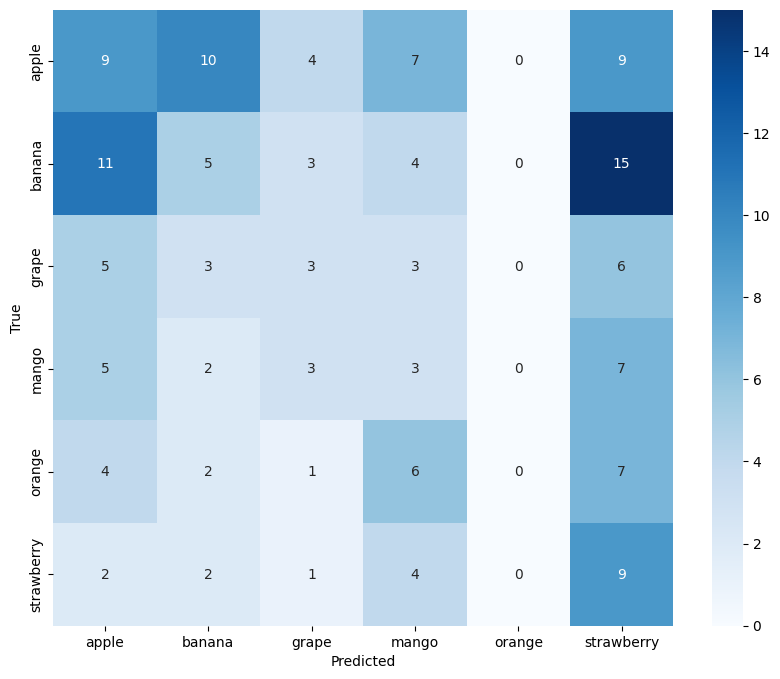

NameError: name 'classification_report' is not defined

In [101]:
import seaborn as sns

# Definindo manualmente os nomes das classes (substitua com suas classes reais)
class_names = ['apple', 'banana', 'grape', 'mango', 'orange','strawberry']

# Fazendo previsões no conjunto de teste
y_pred = modelo2.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtendo os rótulos reais do conjunto de teste
y_true = np.concatenate([y for x, y in test_data], axis=0)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Relatório de classificação
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)